In [2]:
import torch
import torch.nn as nn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

from einops import rearrange, repeat, reduce

from darts.datasets import AirPassengersDataset

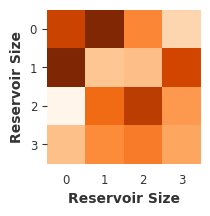

In [12]:
w1 = torch.randn(4,4)

plt.figure(figsize=(2,2))
plt.imshow(w1.detach().numpy(), cmap='Oranges')
plt.xlabel("Reservoir Size")
plt.ylabel("Reservoir Size")
plt.grid(None)
plt.show()

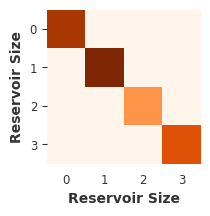

In [11]:
w_d =  torch.empty(4)
d = nn.init.uniform_(w_d, a=-1.0, b=1.0)
w1 = torch.diag(d)

plt.figure(figsize=(2,2))
plt.imshow(w1.detach().numpy(), cmap='Oranges')
plt.xlabel("Reservoir Size")
plt.ylabel("Reservoir Size")
plt.grid(None)
plt.show()

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

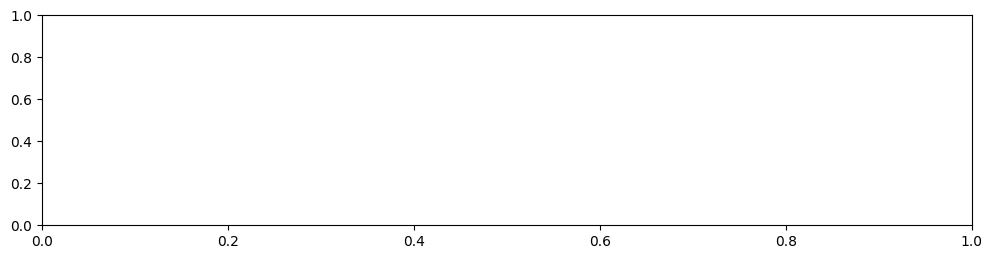

In [1]:
import torch
import matplotlib.pyplot as plt

# Example time series data
time_series = torch.tensor([0.0, 1.0, 0.0, -1.0])

# Perform FFT
fft_result = torch.fft.fft(time_series)

# Compute the frequencies corresponding to the FFT result
n = len(time_series)
frequencies = torch.fft.fftfreq(n)

# Magnitude (power) of the FFT result
magnitude = torch.abs(fft_result)

# Phase of the FFT result
phase = torch.angle(fft_result)

# Plotting the magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(frequencies.numpy(), magnitude.numpy(), use_line_collection=True)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Plotting the phase spectrum
plt.subplot(2, 1, 2)
plt.stem(frequencies.numpy(), phase.numpy(), use_line_collection=True)
plt.title('Phase Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Phase')

plt.tight_layout()
plt.show()


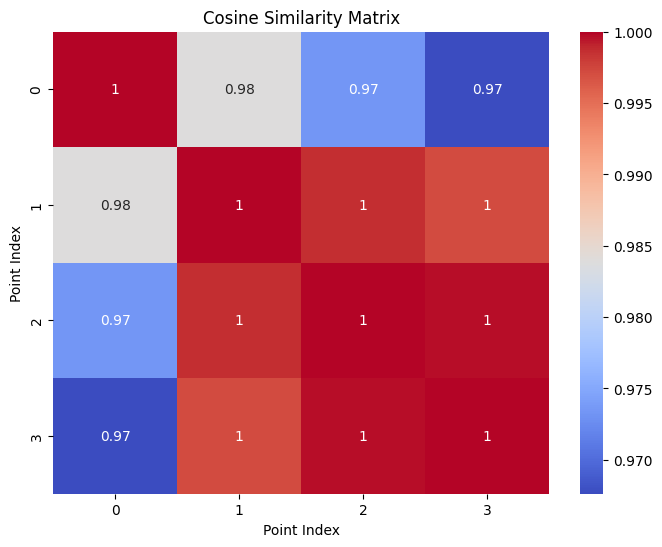

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Example univariate series with N x 2 points
series = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0]])

# Normalize the series (compute the unit vectors)
norms = torch.norm(series, dim=1, keepdim=True)
normalized_series = series / norms

# Compute cosine similarity matrix
cosine_similarity_matrix = torch.mm(normalized_series, normalized_series.t())

# Plotting the cosine similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_similarity_matrix.numpy(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Cosine Similarity Matrix")
plt.xlabel("Point Index")
plt.ylabel("Point Index")
plt.show()


In [4]:
series = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0]])
series

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])

In [5]:
norms = torch.norm(series, dim=1, keepdim=True)
norms

tensor([[ 2.2361],
        [ 5.0000],
        [ 7.8102],
        [10.6301]])

In [8]:
torch.sum(series[:, 0])


tensor(16.)